In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Build and train model

In [2]:
def build_model(learning_rate):
    # create sequential model
    model = tf.keras.models.Sequential()

    # add a single-node layer
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # compile model using root mean square propagator optimizer
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
                  loss = 'mean_squared_error',
                  metrics = tf.keras.metrics.RootMeanSquaredError())
    
    return model


def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)
    weight = model.get_weights()[0][0][0]
    bias = model.get_weights()[1][0]
    epochs = history.epoch

    hist = pd.DataFrame(history.history)
    rmse = hist['root_mean_squared_error'].values

    return weight, bias, epochs, rmse

Plotting functions

In [3]:
def plot_model(weight, bias, feature, label):
    plt.xlabel("feature")
    plt.ylabel("label")

    # plot data
    plt.scatter(feature, label)

    # plot line representing the model
    x0 = 0
    y0 = bias
    x1 = feature.max()
    y1 = bias + (weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    plt.show()

def plot_loss(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    # plot loss at each epoch
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

Data

In [4]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Hyperparameters

In [5]:
learning_rate=0.01
epochs=10
batch_size=12

Train and plot

Epoch 1/10
1/1 [==============================] - 0s 284ms/step - loss: 615.7475 - root_mean_squared_error: 24.8143
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 602.8690 - root_mean_squared_error: 24.5534
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 593.6578 - root_mean_squared_error: 24.3651
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 586.0228 - root_mean_squared_error: 24.2079
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 579.3020 - root_mean_squared_error: 24.0687
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 573.1887 - root_mean_squared_error: 23.9414
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 567.5121 - root_mean_squared_error: 23.8225
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 562.1662 - root_mean_squared_error: 23.7100
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 557.0798 - root_m

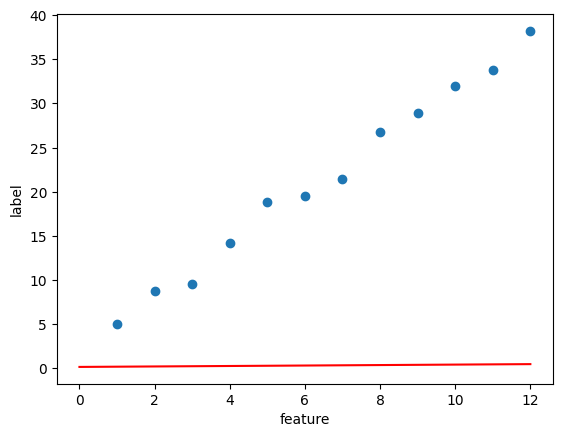

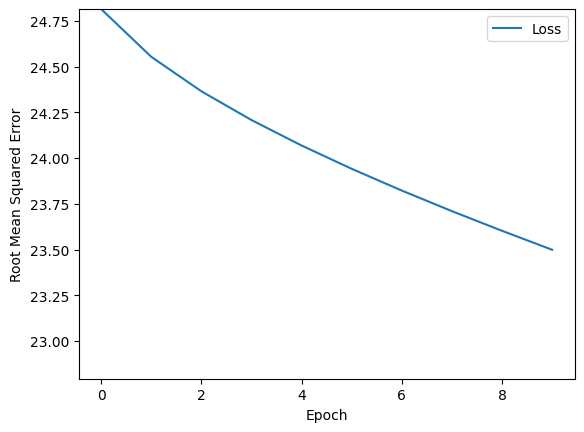

In [7]:
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, my_feature, my_label, epochs, batch_size)

plot_model(weight, bias, my_feature, my_label)
plot_loss(epochs, rmse)

Better hyperparameters

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 870.9585 - root_mean_squared_error: 29.5120
Epoch 2/100
6/6 [==============================] - 0s 407us/step - loss: 673.4111 - root_mean_squared_error: 25.9502
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 555.3679 - root_mean_squared_error: 23.5662
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 463.4361 - root_mean_squared_error: 21.5276
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 383.7449 - root_mean_squared_error: 19.5894
Epoch 6/100
6/6 [==============================] - 0s 647us/step - loss: 313.7037 - root_mean_squared_error: 17.7117
Epoch 7/100
6/6 [==============================] - 0s 307us/step - loss: 251.7668 - root_mean_squared_error: 15.8672
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 197.2642 - root_mean_squared_error: 14.0451
Epoch 9/100
6/6 [==============================] - 0s 65us/step - loss: 15

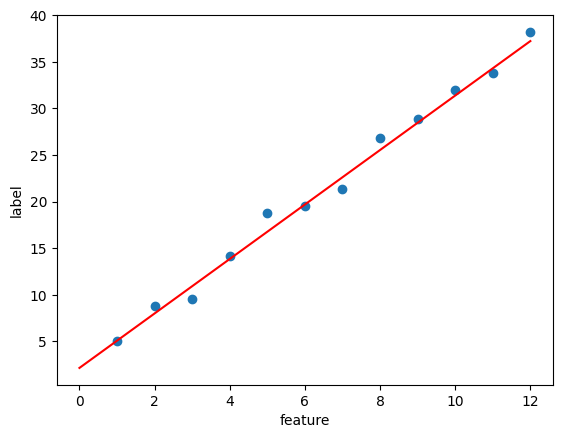

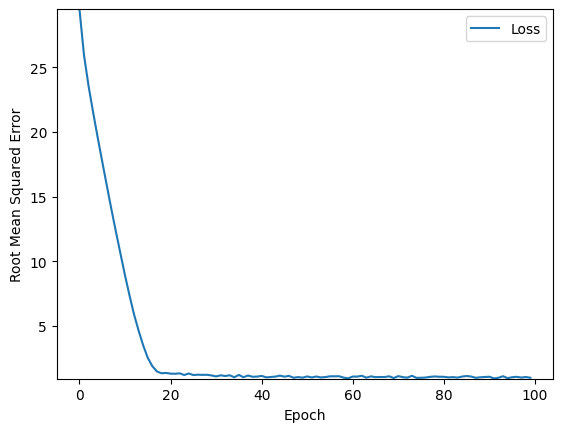

In [8]:
learning_rate=0.05
epochs=100
batch_size=2

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, my_feature, my_label, epochs, batch_size)

plot_model(weight, bias, my_feature, my_label)
plot_loss(epochs, rmse)

# Housing prices

In [4]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

training_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
training_df['median_house_value'] /= 1000. # scale label for better learning rate
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


First training

Epoch 1/50
57/57 [==============================] - 0s 1ms/step - loss: 195726.3906 - root_mean_squared_error: 442.4098
Epoch 2/50
57/57 [==============================] - 0s 1ms/step - loss: 37648.8398 - root_mean_squared_error: 194.0331
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 38826.7891 - root_mean_squared_error: 197.0452
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 39061.6836 - root_mean_squared_error: 197.6403
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 38216.7305 - root_mean_squared_error: 195.4910
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 36741.9258 - root_mean_squared_error: 191.6818
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 37143.8164 - root_mean_squared_error: 192.7273
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 34211.1562 - root_mean_squared_error: 184.9626
Epoch 9/50
57/57 [=============================

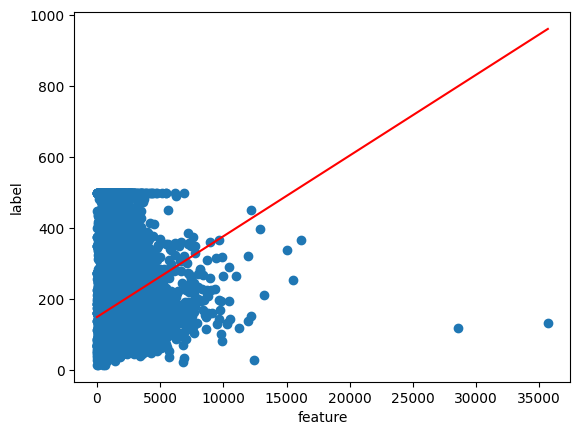

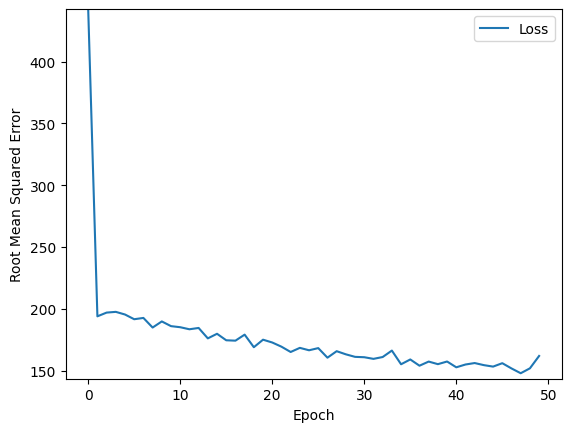

In [9]:
learning_rate=0.1
epochs=50
batch_size=300

model = None
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df['population'], training_df['median_house_value'], epochs, batch_size)

plot_model(weight, bias, training_df['population'].values, training_df['median_house_value'].values)
plot_loss(epochs, rmse)

Try to engineer a feature

Epoch 1/50
57/57 [==============================] - 0s 1ms/step - loss: 160836.7500 - root_mean_squared_error: 401.0446
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 39572.1328 - root_mean_squared_error: 198.9275
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 39505.6016 - root_mean_squared_error: 198.7602
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 38063.7695 - root_mean_squared_error: 195.0994
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 35282.1953 - root_mean_squared_error: 187.8356
Epoch 6/50
57/57 [==============================] - 0s 1ms/step - loss: 36206.7852 - root_mean_squared_error: 190.2808
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 37817.2969 - root_mean_squared_error: 194.4667
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 35140.1523 - root_mean_squared_error: 187.4571
Epoch 9/50
57/57 [=============================

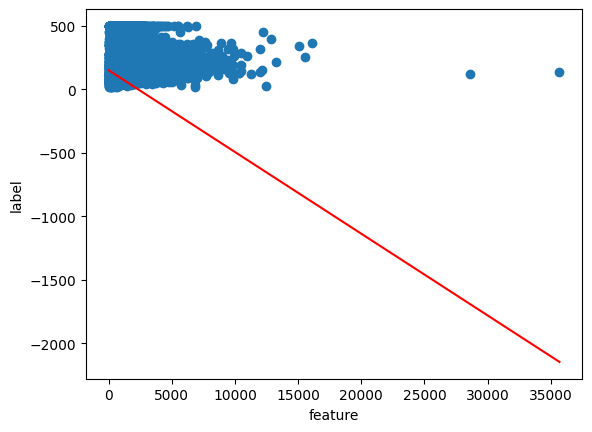

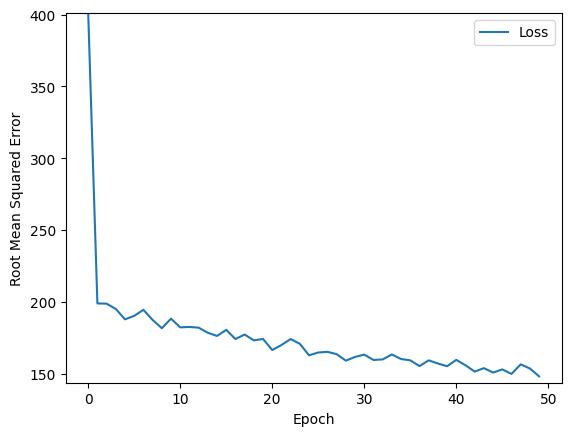

In [5]:
training_df['rooms_per_person'] = training_df['total_rooms'] / training_df['population']

learning_rate=0.1
epochs=50
batch_size=300

model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df['population'], training_df['median_house_value'], epochs, batch_size)

plot_model(weight, bias, training_df['population'].values, training_df['median_house_value'].values)
plot_loss(epochs, rmse)

Use correlation matrix to find relevant feature

In [6]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/50
57/57 [==============================] - 0s 2ms/step - loss: 50512.6680 - root_mean_squared_error: 224.7502
Epoch 2/50
57/57 [==============================] - 0s 1ms/step - loss: 38906.2227 - root_mean_squared_error: 197.2466
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 29432.3281 - root_mean_squared_error: 171.5585
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 21641.7520 - root_mean_squared_error: 147.1114
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 15554.1572 - root_mean_squared_error: 124.7163
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 11172.1855 - root_mean_squared_error: 105.6986
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 8444.3965 - root_mean_squared_error: 91.8934
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 7202.5708 - root_mean_squared_error: 84.8680
Epoch 9/50
57/57 [==============================] - 

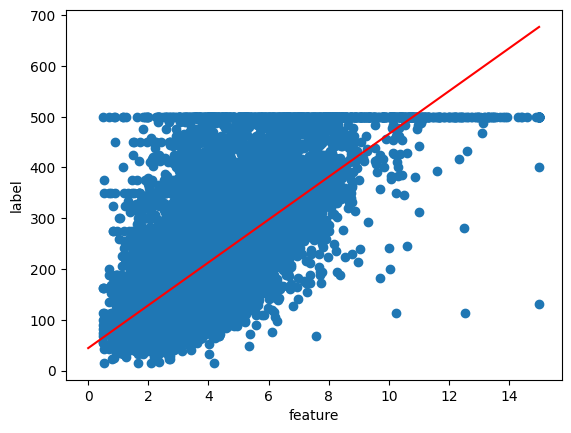

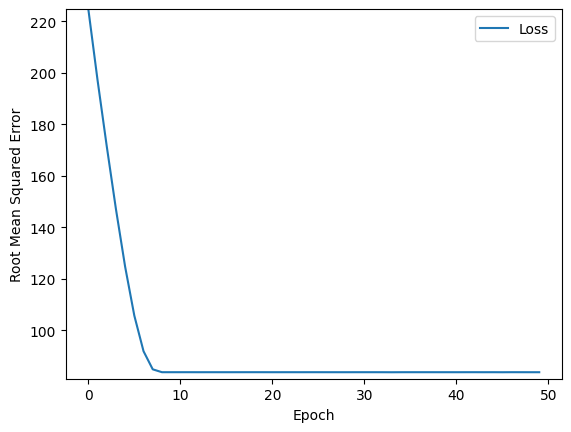

In [7]:
learning_rate=0.1
epochs=50
batch_size=300

model = None
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, training_df['median_income'], training_df['median_house_value'], epochs, batch_size)

plot_model(weight, bias, training_df['median_income'].values, training_df['median_house_value'].values)
plot_loss(epochs, rmse)